# Clustering with Genetic Algorithm

This Jupyter notebook demonstrates the use of a Genetic Algorithm to cluster data points. The algorithm is applied to the Iris dataset, which contains measurements of 150 iris flowers from three different species.

## Import Libraries

```python
import numpy as np
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance
import random
import matplotlib.pyplot as plt
```

## Load Data

The Iris dataset is loaded using the `datasets` module from `sklearn`. Only the features are used for clustering.

```python
iris = datasets.load_iris()
X = iris.data
```

## Parameters

The number of chromosomes in the population, the maximum number of generations, and the number of clusters are defined as parameters.

```python
num_individuals = 100
max_generations = 50
num_clusters = 3
```

## Initialize Population

The `initialize_population` function generates a random population of chromosomes. Each chromosome is an array of integers representing the cluster assignment for each data point.

```python
def initialize_population(num_individuals, num_data_points, num_clusters):
    return [np.random.randint(1, num_clusters+1, size=num_data_points) for _ in range(num_individuals)]
```

## Fitness Function

The `calculate_fitness` function calculates the fitness of a chromosome. It separates the data points into clusters based on the chromosome's cluster assignments and then calculates the sum of the mean pairwise distances within each cluster. The lower the sum, the better the fitness.

```python
def calculate_fitness(chromosome, data):
    clusters = {i: data[chromosome == i] for i in range(1, num_clusters+1)}
    intra_distance_sum = sum(np.mean(pairwise_distances(clusters[i])) for i in clusters if len(clusters[i]) > 1)
    return intra_distance_sum
```

## Crossover and Mutation

The `crossover` function performs a single-point crossover between two parent chromosomes to create two child chromosomes. The `mutate` function randomly changes the cluster assignment of a single data point in a chromosome.

```python
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

def mutate(chromosome, num_clusters):
    mutation_idx = random.randint(0, len(chromosome) - 1)
    chromosome[mutation_idx] = random.randint(1, num_clusters)
    return chromosome
```

## Visualization

The `plot_clusters` function visualizes the clusters at a given generation. The `plot_fitness_history` function plots the fitness evolution over generations.

```python
def plot_clusters(data, chromosome, generation):
    # ...

def plot_fitness_history(fitness_history):
    # ...
```

## Genetic Algorithm

The `genetic_algorithm` function implements the main steps of the genetic algorithm: initialization, fitness calculation, selection, crossover, mutation, and visualization. It returns the best chromosome and its fitness.

```python
def genetic_algorithm(X, num_clusters):
    # ...
    return best_chromosome, best_fitness
```

## Run the Algorithm

The algorithm is run on the Iris dataset with the defined parameters. The best fitness and the best chromosome are printed.

```python
best_solution, best_fitness = genetic_algorithm(X, num_clusters)
print("Best Fitness:", best_fitness)
```

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from scipy.spatial import distance
import random
import matplotlib.pyplot as plt

In [51]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Only use the features for clustering

In [52]:
# Parameters
num_individuals = 100  # Number of chromosomes in the population
max_generations = 50   # Maximum number of generations
num_clusters = 3       # Number of clusters

In [53]:
# Initialize population
def initialize_population(num_individuals, num_data_points, num_clusters):
    return [np.random.randint(1, num_clusters+1, size=num_data_points) for _ in range(num_individuals)]

In [54]:
# Fitness function
def calculate_fitness(chromosome, data):
    clusters = {i: data[chromosome == i] for i in range(1, num_clusters+1)}
    intra_distance_sum = sum(np.mean(pairwise_distances(clusters[i])) for i in clusters if len(clusters[i]) > 1)
    return intra_distance_sum

In [55]:
# Crossover
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = np.concatenate([parent1[:point], parent2[point:]])
    child2 = np.concatenate([parent2[:point], parent1[point:]])
    return child1, child2

In [56]:
# Mutation
def mutate(chromosome, num_clusters):
    mutation_idx = random.randint(0, len(chromosome) - 1)
    chromosome[mutation_idx] = random.randint(1, num_clusters)
    return chromosome

In [58]:
# Visualization of clusters
def plot_clusters(data, chromosome, generation):
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    plt.figure(figsize=(8, 6))
    for i in range(1, num_clusters+1):
        points = data[chromosome == i]
        if len(points) > 0:
            plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i % len(colors)], label=f'Cluster {i}')
    plt.title(f'Cluster visualization at Generation {generation}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Track fitness over generations
def plot_fitness_history(fitness_history):
    plt.figure(figsize=(8, 6))
    plt.plot(fitness_history, marker='o', linestyle='-')
    plt.title('Fitness Evolution Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()


In [59]:
# Main Genetic Algorithm function
def genetic_algorithm(X, num_clusters):
    population = initialize_population(num_individuals, X.shape[0], num_clusters)
    best_fitness_history = []

    for generation in range(max_generations):
        fitness_scores = [calculate_fitness(ind, X) for ind in population]
        best_fitness_history.append(min(fitness_scores))

        # Selection
        total_fitness = sum(fitness_scores)
        probabilities = [f / total_fitness for f in fitness_scores]
        selected_indices = np.random.choice(range(num_individuals), size=num_individuals, replace=True, p=probabilities)
        selected_population = [population[idx] for idx in selected_indices]

        # Create next generation
        next_population = []
        for i in range(0, num_individuals, 2):
            p1, p2 = selected_population[i], selected_population[i+1]
            c1, c2 = crossover(p1, p2)
            c1 = mutate(c1, num_clusters)
            c2 = mutate(c2, num_clusters)
            next_population.extend([c1, c2])

        population = next_population

        # Visualization at certain intervals
        if generation % 10 == 0:
            plot_clusters(X, population[0], generation)

    best_fitness = min(best_fitness_history)
    best_chromosome = population[np.argmin([calculate_fitness(ind, X) for ind in population])]
    
    # Plot fitness evolution
    plot_fitness_history(best_fitness_history)
    
    return best_chromosome, best_fitness

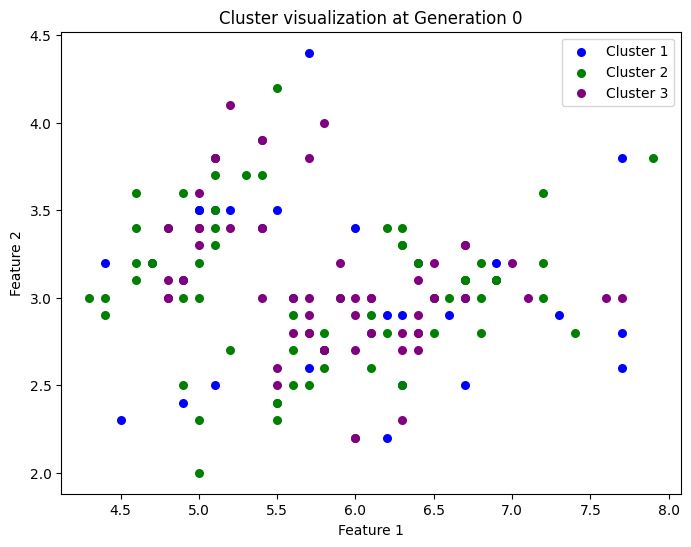

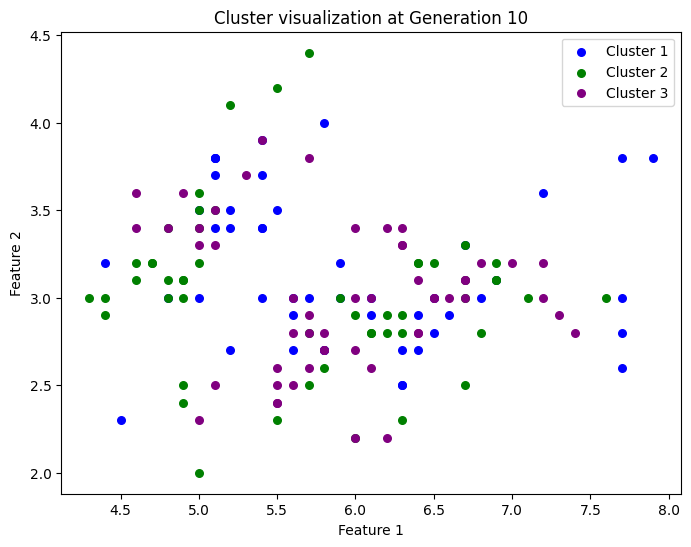

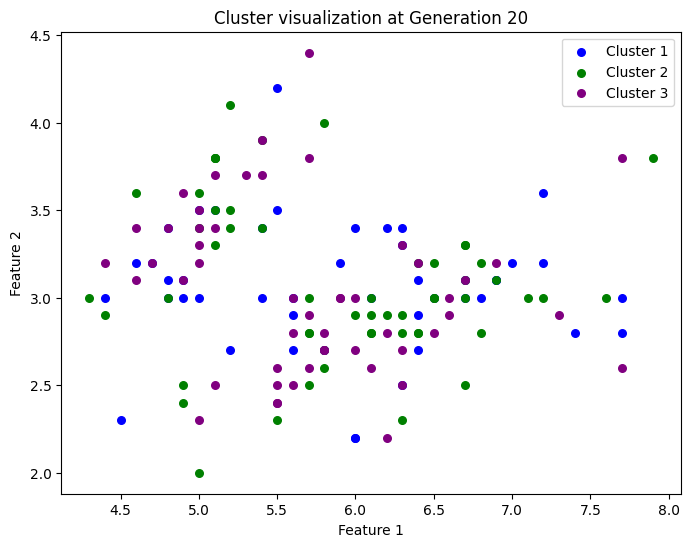

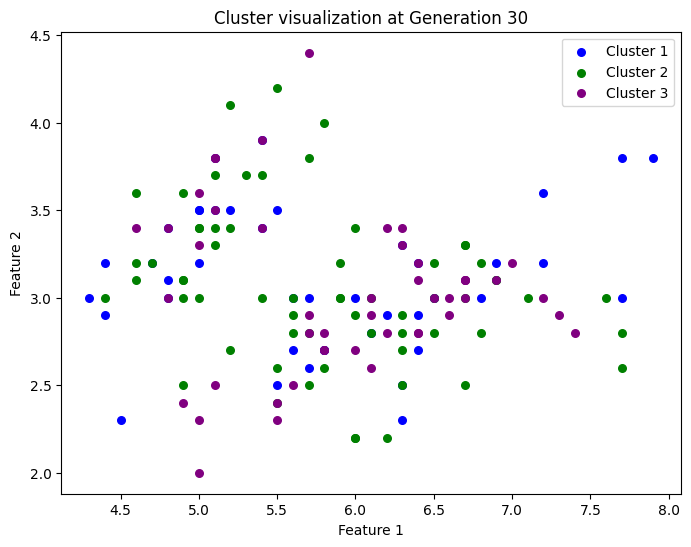

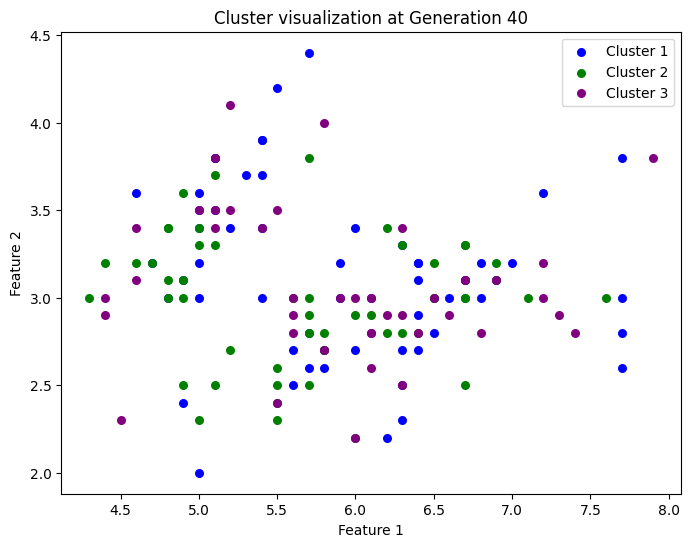

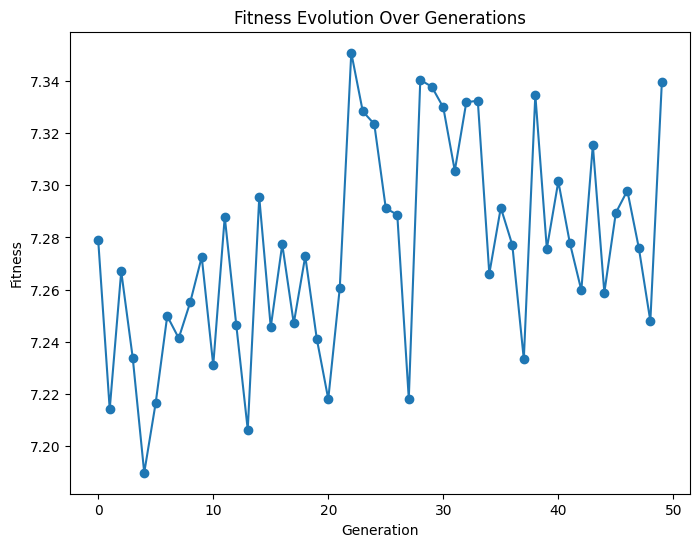

Best Fitness: 7.189834285701581


In [60]:
# Run the algorithm
best_solution, best_fitness = genetic_algorithm(X, num_clusters)
print("Best Fitness:", best_fitness)